Simple Stock Analysis

Stock analysis is the evaluation or examination of the stock market. There are many trading tools to use to analysis stocks such as fundamental and technical analysis. Fundamental analysis is more focused on data from the financial statements, economic reports, and company assets. Technical analysis is based on the study of the past of historical price to predict the future price movement. However, this tutorial is not to get rich quick. Therefore, do not use your money to trade based on this stock analysis. Please do not use this method to invest with your money and I am not responsible for you loss.   

Simple stock is a basic stock analysis tutorial. There are 7 parts in this tutorial. 
1. Import Libraries
2. Get data from Yahoo
3. Analysis Data
4. Understand the Data based on Statistics
5. Calculate Prices
6. Plot Charts
7. Calculate Holding Period Return

I. Import Libraries

In [ ]:
# Import Libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

II. Get Data from Yahoo!

This section we will pull the data from the website in Yahoo. We will be using the company of Apple and the symbol is 'AAPL'. Also, we will have a starting date and ending date.

In [2]:
# enter ticker of your chosing to analyze
# for this example we will use 'aapl'
stock = input("Enter ticker of stock:")

# pull the ticker from the yahoo finance api
df = yf.download(stock)

Enter ticker of stock: aapl


[*********************100%***********************]  1 of 1 completed


III. Analyze Data

In [3]:
# the first 5 rows
display(df.head()) 

# the last 5 rows
display(df.tail())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099874,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094663,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087715,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089886,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092492,73449600


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-10,141.240005,146.869995,139.500000,146.869995,146.869995,118854000
2022-11-11,145.820007,150.009995,144.369995,149.699997,149.699997,93903800
2022-11-14,148.970001,150.279999,147.429993,148.279999,148.279999,73374100
2022-11-15,152.220001,153.589996,148.559998,150.039993,150.039993,89868300
2022-11-16,149.130005,149.869995,147.289993,148.789993,148.789993,63918648


In [4]:
# (rows, columns)
df.shape

(10573, 6)

In [5]:
# Shows names of columns
df.columns 


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
# Shows data types
df.dtypes 

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
# Shows information about DataFrame
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10573 entries, 1980-12-12 to 2022-11-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10573 non-null  float64
 1   High       10573 non-null  float64
 2   Low        10573 non-null  float64
 3   Close      10573 non-null  float64
 4   Adj Close  10573 non-null  float64
 5   Volume     10573 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 578.2 KB


In [8]:
# Shows summary statistics based on stock data 
df.describe() 

,Open,High,Low,Close,Adj Close,Volume
count,10573.000000,10573.000000,10573.000000,10573.000000,10573.000000,1.057300e+04
mean,16.115254,16.298066,15.934885,16.123227,15.450956,3.283794e+08
std,34.541994,34.959766,34.137658,34.565143,34.225272,3.380624e+08
min,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,0.285714,0.293527,0.279018,0.285893,0.236546,1.218784e+08
50%,0.483929,0.491071,0.475446,0.483259,0.399669,2.155552e+08
75%,15.850714,16.017143,15.650714,15.813571,13.705923,4.072992e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,7.421641e+09


IV. Understand the Data based on Statistics

Using "Adj. Close" price to find the minimum, maximum, average and standard deviation prices. The reason we are using "Adj. Close" is to show historical returns. The Adjusted Prices itakes into account the dividend and splits, while the Close price does not include dividend and splits.

In [9]:
# Use only Adj. Closing
# Find the minimum
df['Adj Close'].min()

0.03821254521608353

In [10]:
# Use only Adj. Closing
# Find the maximum
df['Adj Close'].max()

180.95973205566406

In [11]:
# Use only Adj. Closing
# Find the average
df['Adj Close'].mean()

15.450955649791519

In [12]:
# Use only Adj. Closing
# Find the standard deviation
df['Adj Close'].std()

34.22527198659908

V. Calculate the Prices

This section, we will be calculating the daily returns, log returns, and other technical indicators such as RSI(Relative Strength Index), MA(Moving Average), SMA(Simple Moving Averga), EMA(Exponential Moving Average), and VWAP(Voume Weighted Average Price). We will also calculate drawdowns.

In [13]:
# Daily Returns
# Formula: (Today Price / Yesterday Price) - 1 
df['Daily_Returns'] = df['Adj Close'].shift(1) / df['Adj Close']  - 1
df['Daily_Returns'].head()

Date
1980-12-12         NaN
1980-12-15    0.055042
1980-12-16    0.079212
1980-12-17   -0.024153
1980-12-18   -0.028176
Name: Daily_Returns, dtype: float64

In [14]:
# Another way of calculating Daily Returns in simple way
daily_returns = df['Adj Close'].pct_change(1) # 1 is for "One Day" in the past
daily_returns.head()

Date
1980-12-12         NaN
1980-12-15   -0.052171
1980-12-16   -0.073398
1980-12-17    0.024751
1980-12-18    0.028992
Name: Adj Close, dtype: float64

In [15]:
# Log Returns
# Formula: log(Today Price/ Yesterday Price)
df['Log_Returns'] = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))

In this part of this section, we will be using the library of technical analysis. This packages has many different types of technical indicators. However, it does not have every single technical indicators.
We do not need to do calculation since the library has done it for us.
https://mrjbq7.github.io/ta-lib/doc_index.html

In [16]:
import talib as ta

# Creating Indicators
n=30 # number of periods

# RSI(Relative Strength Index)
# RSI is technical analysis indicator
# https://www.investopedia.com/terms/r/rsi.asp
df['RSI']=ta.RSI(np.array(df['Adj Close'].shift(1)), timeperiod=n)

# MA(Moving Average)
# https://www.investopedia.com/terms/m/movingaverage.asp
df['MA']=ta.MA(np.array(df['Adj Close'].shift(1)), timeperiod=n, matype=0)

# SMA(Simple Moving Average)
# https://www.investopedia.com/terms/s/sma.asp
df['SMA']=ta.SMA(np.array(df['Adj Close'].shift(1)))

# EMA(Exponential Moving Average)
# https://www.investopedia.com/terms/e/ema.asp
df['EMA']=ta.EMA(np.array(df['Adj Close'].shift(1)), timeperiod=n)

In [17]:
# Volume Weighted Average Price - VWAP
# http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:vwap_intraday
df['VWAP'] = round(np.cumsum(df['Volume']*(df['High']+df['Low'])/2) / np.cumsum(df['Volume']), 2)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Returns,Log_Returns,RSI,MA,SMA,EMA,VWAP
Date,,,,,,,,,,,,,
2022-11-10,141.240005,146.869995,139.500000,146.869995,146.869995,118854000,-0.081705,0.085236,41.991193,143.532070,143.532070,145.136704,8.68
2022-11-11,145.820007,150.009995,144.369995,149.699997,149.699997,93903800,-0.018904,0.019085,49.339057,143.686269,143.686269,145.248529,8.68
2022-11-14,148.970001,150.279999,147.429993,148.279999,148.279999,73374100,0.009576,-0.009531,50.857686,144.077232,144.077232,145.535721,8.69
2022-11-15,152.220001,153.589996,148.559998,150.039993,150.039993,89868300,-0.011730,0.011800,50.078477,144.279429,144.279429,145.712771,8.69
2022-11-16,149.130005,149.869995,147.289993,148.789993,148.789993,63918648,0.008401,-0.008366,51.040273,144.418827,144.418827,145.991946,8.69


In [18]:
# Drawdown
# Drawdown shows the decline price since the stock began trading
# https://www.investopedia.com/terms/d/drawdown.asp
# There are 252 trading day in a year
window = 252

# Calculate the maximum drawdown
# Use the min_period of 1 (1 is the least valid observations) for the first 252 day in the data
Maximum_Drawdown = df['Adj Close'].rolling(window, min_periods=1).max()
Daily_Drawdown = df['Adj Close']/Maximum_Drawdown - 1.0

# Calculate the negative drawdown
Negative_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()

VI. Plot Charts

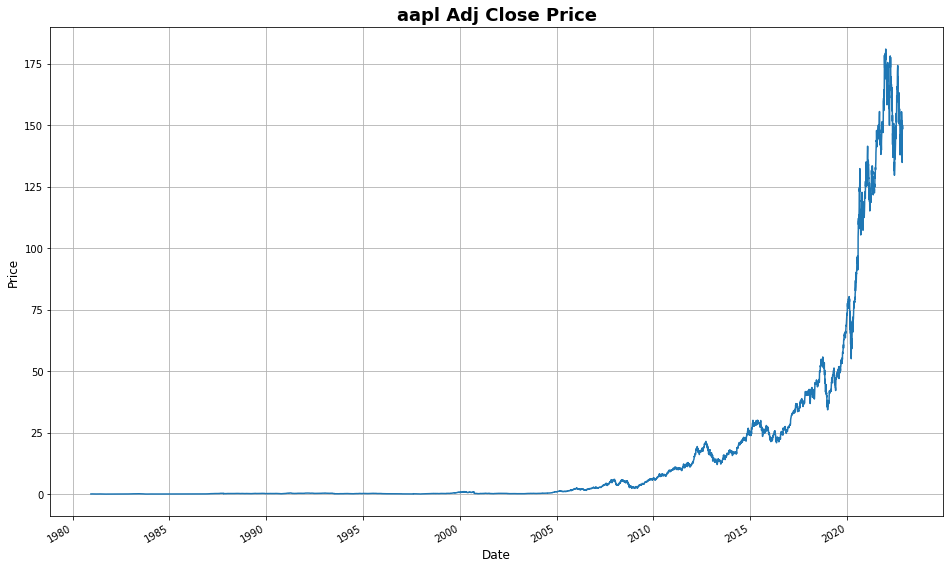

In [19]:
# Plot Simple Line Chart
# Plot Adj Close

plt.figure(figsize=(16,10))
df['Adj Close'].plot(grid=True)
plt.title(f"{stock} Adj Close Price", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price",fontsize=12)
# plt.savefig('./Images/AdjClosePrice.png')
plt.show()

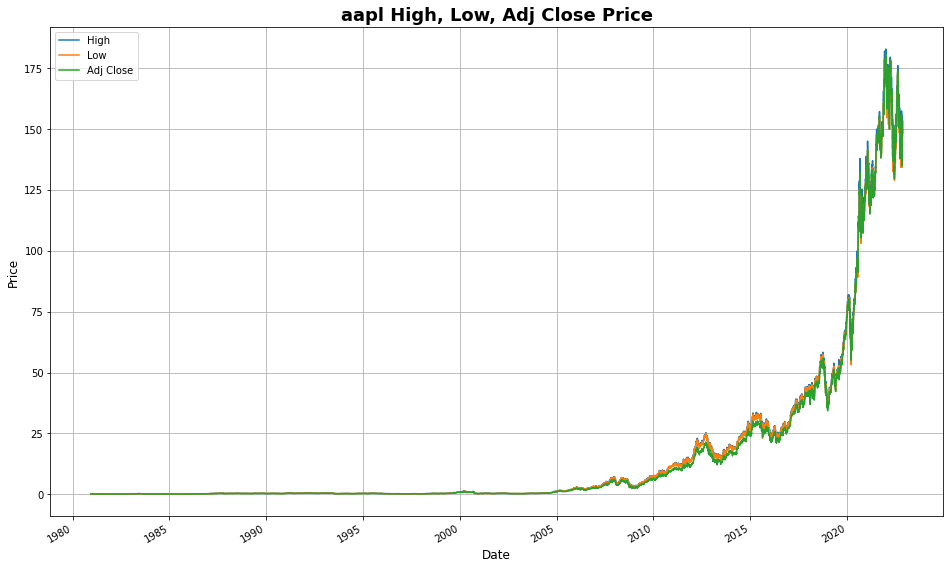

In [20]:
# Plot High, Low, Adj Close
df[['High', 'Low', 'Adj Close']].plot(figsize=(16,10), grid=True)
plt.title(f"{stock} High, Low, Adj Close Price", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
# plt.savefig('./Images/HighLowAdjClosePrice.png')
plt.show()

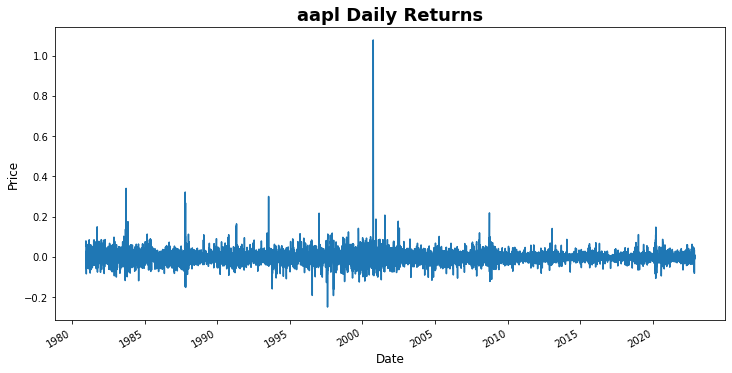

In [21]:
# Plot Daily Returns
df['Daily_Returns'].plot(figsize=(12,6))
plt.title(f"{stock} Daily Returns",fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
# plt.savefig('./Images/DailyReturns.png')
plt.show()

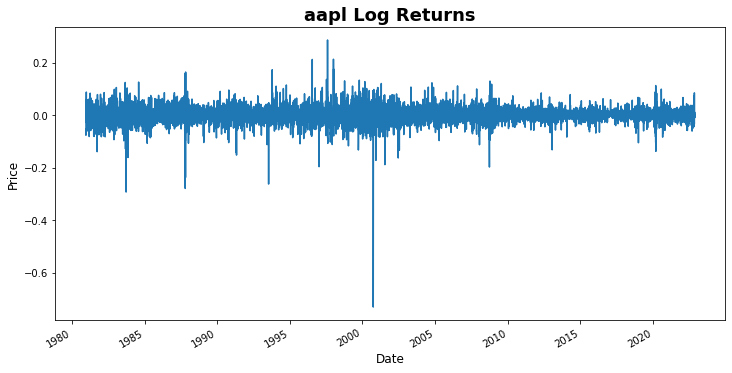

In [22]:
# Plot Log Returns
df['Log_Returns'].plot(figsize=(12,6))
plt.title(f"{stock} Log Returns", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
# plt.savefig('./Images/LogReturns.png')
plt.show()

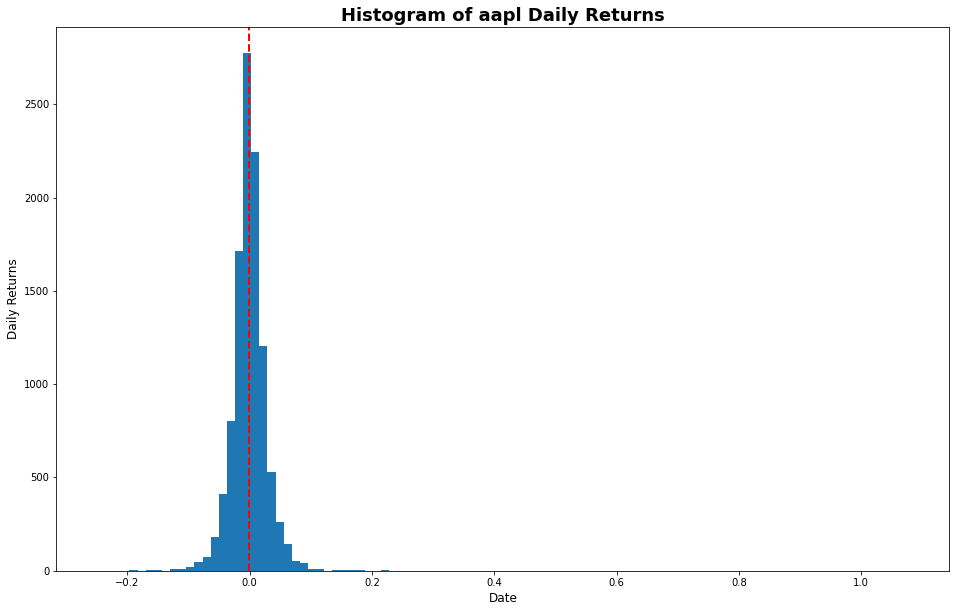

In [23]:
# Histogram of Daily Returns
# Histogram is distribution of numerical data and has a rectangle whose area is prportional to the frequency of a variable. 
plt.figure(figsize=(16,10))
plt.hist(df['Daily_Returns'].dropna(), bins=100, label='Daily Returns data') # Drop NaN
plt.title(f"Histogram of {stock} Daily Returns", fontsize=18, fontweight='bold')
plt.axvline(df['Daily_Returns'].mean(), color='r', linestyle='dashed', linewidth=2) # Shows the average line
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily Returns", fontsize=12)
# plt.savefig('./Images/Histogram.png')
plt.show()

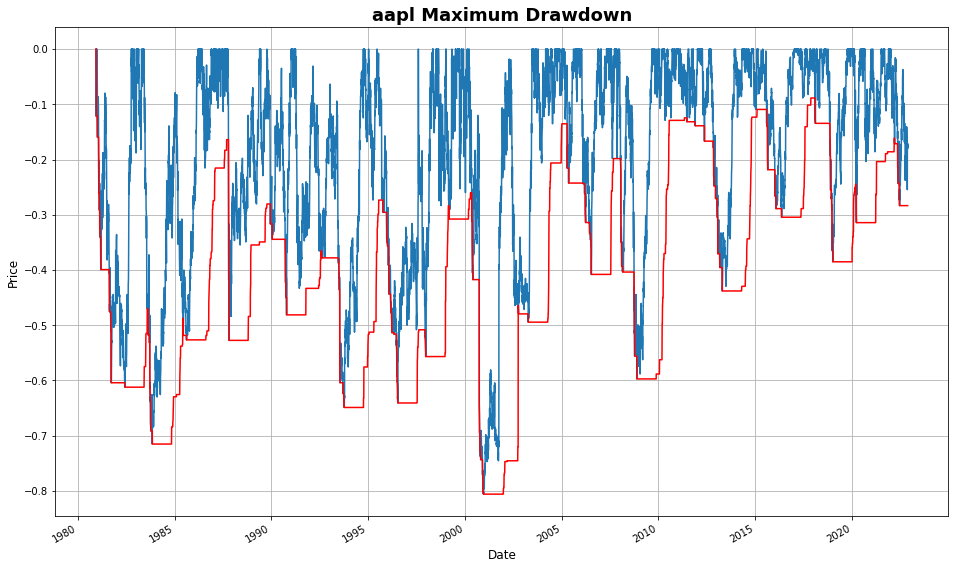

In [24]:
# Plot Drawdown
plt.figure(figsize=(16,10))
Daily_Drawdown.plot()
Negative_Drawdown.plot(color='r',grid=True) 
plt.title(f"{stock} Maximum Drawdown", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
# plt.savefig('./Images/MaxDD.png')
plt.show()

VII. Holding Period Return(HPR)

Holding period return (HPR) is the rate of return on an individual stocks or portfolio over the whole period during the time it was held and it a measurement of investment performance. 

In [25]:
# https://www.investopedia.com/exam-guide/series-65/quantitative-methods/holding-period-return.asp
# Formula: (Ending Value of Investment + Dividend - Beginning Value of Investment) / Beginning Value of Investment
# To get dividend in Yahoo!
DIV = yf.download(stock, actions=True)['Dividends']

[*********************100%***********************]  1 of 1 completed


In [26]:
# See how much dividends and splits was given during the time period
DIV

Date
1980-12-12    0.0
1980-12-15    0.0
1980-12-16    0.0
1980-12-17    0.0
1980-12-18    0.0
             ... 
2022-11-10    0.0
2022-11-11    0.0
2022-11-14    0.0
2022-11-15    0.0
2022-11-16    0.0
Name: Dividends, Length: 10573, dtype: float64

In [27]:
# Add all the dividend
Total_Dividend = DIV.sum()
Total_Dividend

6.833564

In [28]:
# You invest since the beginning and sold it end of 2022
HPR = (df['Adj Close'][502] + Total_Dividend - df['Adj Close'][0]) / df['Adj Close'][0]
HPR

68.57415874366167

In [29]:
# You can use round for 4 decimal points
print('Holding Period Return: ', str(round(HPR,4)*100)+"%")

Holding Period Return:  6857.42%


We going to pick another stocks that is Microsoft and we will compare it to Apple.

In [30]:
stock2 = input("Enter the name of another ticker")
df2 =  yf.download(stock2)['Adj Close'] # Use Adj Close only
df2_DIV = yf.download(stock2, actions=True)['Dividends']

Enter the name of another ticker msft


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [31]:
# Shows only Date and Adj Close
display(df2.head()) 
display(df2.tail())

Date
1986-03-13    0.060980
1986-03-14    0.063158
1986-03-17    0.064247
1986-03-18    0.062613
1986-03-19    0.061524
Name: Adj Close, dtype: float64

Date
2022-11-10    242.979996
2022-11-11    247.110001
2022-11-14    241.550003
2022-11-15    241.970001
2022-11-16    241.729996
Name: Adj Close, dtype: float64

In [32]:
# Shows how much dividend was given
df2_DIV 

Date
1986-03-13    0.0
1986-03-14    0.0
1986-03-17    0.0
1986-03-18    0.0
1986-03-19    0.0
             ... 
2022-11-10    0.0
2022-11-11    0.0
2022-11-14    0.0
2022-11-15    0.0
2022-11-16    0.0
Name: Dividends, Length: 9247, dtype: float64

In [33]:
df2_Dividend = df2_DIV.sum()
df2_Dividend

23.870000000000005

In [34]:
# You invest from the beginning and just sold it
df2_HPR = (df2[502] + Total_Dividend - df2[0]) / df2[0]
df2_HPR

115.62502484518669

In [35]:
# You can use round for 4 decimal points
print(f'{stock} Holding Period Return: ', str(round(HPR,4)*100)+"%")
print(f'{stock2} Holding Period Return: ', str(round(df2_HPR,4)*100)+"%")

aapl Holding Period Return:  6857.42%
msft Holding Period Return:  11562.5%


In the conclusion, we use 2 stocks to compare holding period return. Microsoft has a higher holding period return than Apple. Based on this analysis, I would invest in Microsoft.If you comparing 2 stocks for a portfolio it is suggest to pick the one with the highest rate of return. 